# Data Analysis Final project:

# Group 46

# Fortune 500

###  Name of students:
Shaked Amsalem<br>
Noy Talala<br>




<a id='top'></a>
<div>
<img src="https://github.com/Shakedams/project1/blob/main/fortune_500.jpg?raw=true" width="800"/>
</div>


## Imported Libraries :

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from sklearn.linear_model import LinearRegression
import geopandas as gpd

---

# Data Information :
#### The purpose of our project להשלים.<br> 
#### Our data is sourced from the Kaggle website.

## Data Source :

https://www.kaggle.com/datasets/rm1000/fortune-500-companies

## Importing Data :

In [2]:
url = 'https://raw.githubusercontent.com/Shakedams/project1/main/Fortune%20500%20Companies.csv'
fortune_df = pd.read_csv(url)
fortune_df

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [3]:
fortune_df.shape

(13940, 16)

In [4]:
fortune_df.columns

Index(['name', 'rank', 'year', 'industry', 'sector', 'headquarters_state',
       'headquarters_city', 'market_value_mil', 'revenue_mil', 'profit_mil',
       'asset_mil', 'employees', 'founder_is_ceo', 'female_ceo',
       'newcomer_to_fortune_500', 'global_500'],
      dtype='object')

In [5]:
fortune_df.dtypes

name                        object
rank                         int64
year                         int64
industry                    object
sector                      object
headquarters_state          object
headquarters_city           object
market_value_mil           float64
revenue_mil                float64
profit_mil                 float64
asset_mil                  float64
employees                  float64
founder_is_ceo              object
female_ceo                  object
newcomer_to_fortune_500     object
global_500                  object
dtype: object

In [6]:
fortune_df.isnull().sum().sort_values(ascending=False)

global_500                 9940
sector                     9440
employees                  9440
founder_is_ceo             9440
female_ceo                 9440
newcomer_to_fortune_500    9440
market_value_mil           8755
profit_mil                 8443
asset_mil                  8440
headquarters_city          6445
name                          0
rank                          0
year                          0
industry                      0
headquarters_state            0
revenue_mil                   0
dtype: int64

---

## Function in use :

In [7]:
#הדפסת עמודות עם המון ערכים ריקים
def columns_with_empty_values_above_threshold(df, threshold):
    columns_with_empty = []
    for column in df.columns:
        empty_count = df[column].isnull().sum()
        if empty_count > threshold:
            columns_with_empty.append(column)
    return columns_with_empty

#הדפסת מספר שורות עם המון ערכים ריקים
def count_rows_with_empty_values(df, threshold):
    num_empty_values = df.isnull().sum(axis=1)
    rows_with_empty_values = (num_empty_values > threshold).sum()
    return rows_with_empty_values

# הסרת ערכים ריקים מעמודות ממספר מסויים ומטה 
def remove_rows_with_empty_values_below_threshold(df, column_name, threshold):
    df_cleaned = df[df[column_name].isnull().sum() >= threshold]
    return df_cleaned

def plot_correlation_heatmap(df, columns,method):
    correlation_data = df[columns].dropna()
    correlation_matrix = correlation_data.corr(method=method)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({method.capitalize()} Method)')
    plt.show()
    
def plot_pie_chart(df, column_name):
    counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

def plot_violin(df, x_col, y_col):
    plt.figure(figsize=(15, 10))
    sns.violinplot(x=x_col, y=y_col, data=df)
    plt.title(f'Violin Plot of {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

def plot_regplot(df, x_col, y_col):
    filtered_data = df.dropna(subset=[x_col, y_col])
    plt.figure(figsize=(10, 6))
    sns.regplot(data=filtered_data, x=x_col, y=y_col)
    plt.title(f'Relationship between {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
def plot_by_category(df, category_column, target_column):
    survival_data = df.groupby(category_column)[target_column].value_counts(normalize=True).unstack() * 100
    survival_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
    plt.title(f'{target_column} Percentages by {category_column}')
    plt.xlabel(category_column.capitalize())
    plt.ylabel('Percentage')
    plt.legend(title=target_column.capitalize(), labels=['0', '1'])
    plt.xticks(rotation=0)
    plt.show()
    
def plot_numeric_vs_categorical(data, numeric_column, categorical_column):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=categorical_column, y=numeric_column, data=data)
    plt.title(f'Boxplot of {numeric_column} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45) 
    plt.show()
    
def plot_histogram_with_kde(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, bins=30, kde=True)
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.show()
    
def plot_numeric_columns(data, numeric_columns):
    num_columns = len(numeric_columns)
    num_rows = num_columns
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    for idx, column in enumerate(numeric_columns):
        row = idx
        sns.violinplot(y=data[column], ax=axes[row, 0])
        axes[row, 0].set_title(f'Violin plot of {column}')
        sns.boxplot(y=data[column], ax=axes[row, 1])
        axes[row, 1].set_title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

def plot_numeric_by_category(data, numeric_column, category_column):
    categories = data[category_column].unique()
    
    for category in categories:
        category_data = data[data[category_column] == category]
        
        plt.figure(figsize=(8, 6))
        sns.countplot(data=category_data, x=numeric_column)
        plt.title(f'Count of {numeric_column} for {category} in {category_column}')
        plt.xlabel(numeric_column)
        plt.ylabel('Count')
        plt.show()
    
def get_numeric_columns(data):
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
    return numeric_columns

def plot_values_by_time(df, column_name):
    df1 = df.copy()
    df1.set_index('Date', inplace=True)
    plt.figure(figsize=(10, 6))
    df1[column_name].plot()
    plt.title(f'{column_name} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.show()

def plot_category_counts_by_month(df, categorical_column):
    df1 = df.copy()
    df1.set_index('Date', inplace=True)

    # Group by the categorical column and resample by month, counting the occurrences
    monthly_counts = df1.groupby([categorical_column, pd.Grouper(freq='M')]).size().unstack(level=0)
    # Plot the data
    monthly_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title(f'Count of {categorical_column} Over Time')
    plt.xlabel('Month')
    plt.ylabel(f'Count of {categorical_column}')
    plt.xticks(rotation=45)
    plt.legend(title=categorical_column)
    plt.show()

def plot_top_categories_percentage(df, categorical_column):
    top_categories = df[categorical_column].value_counts().nlargest(10).index
    filtered_df = df[df[categorical_column].isin(top_categories)]
    percentage_counts = filtered_df[categorical_column].value_counts(normalize=True).loc[top_categories] * 100
    plt.figure(figsize=(10, 10))
    sns.barplot(x=percentage_counts.index, y=percentage_counts.values, order=top_categories, palette='viridis')
    plt.title(f'Percentage of Top 10 {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_top_categories_from_filtered_data(df, first_column, second_column):
    most_frequent_value = df[first_column].value_counts().idxmax()
    filtered_df = df[df[first_column] == most_frequent_value]
    top_10_categories = filtered_df[second_column].value_counts().nlargest(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')
    plt.title(f'Top 10 {second_column} for {first_column} = {most_frequent_value}')
    plt.xlabel(second_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Missing values :

In [8]:
empty_columns = columns_with_empty_values_above_threshold(fortune_df, 6000)
print("Columns with empty values:", empty_columns)

Columns with empty values: ['sector', 'headquarters_city', 'market_value_mil', 'profit_mil', 'asset_mil', 'employees', 'founder_is_ceo', 'female_ceo', 'newcomer_to_fortune_500', 'global_500']


In [9]:
empty_columns = columns_with_empty_values_above_threshold(fortune_df, 3000)
print("Columns with empty values:", empty_columns)

Columns with empty values: ['sector', 'headquarters_city', 'market_value_mil', 'profit_mil', 'asset_mil', 'employees', 'founder_is_ceo', 'female_ceo', 'newcomer_to_fortune_500', 'global_500']


In [10]:
rows_with_empty = count_rows_with_empty_values(fortune_df, threshold=3)
print(f"Number of rows with more than 3 empty values: {rows_with_empty}")

Number of rows with more than 3 empty values: 9440


In [11]:
rows_with_empty = count_rows_with_empty_values(fortune_df, threshold=4)
print(f"Number of rows with more than 4 empty values: {rows_with_empty}")

Number of rows with more than 4 empty values: 9440


In [12]:
rows_with_empty = count_rows_with_empty_values(fortune_df, threshold=5)
print(f"Number of rows with more than 5 empty values: {rows_with_empty}")

Number of rows with more than 5 empty values: 9440


In [13]:
rows_with_empty = count_rows_with_empty_values(fortune_df, threshold=6)
print(f"Number of rows with more than 6 empty values: {rows_with_empty}")

Number of rows with more than 6 empty values: 9440


In [14]:
rows_with_empty1 = count_rows_with_empty_values(fortune_df, threshold=7)
print(f"Number of rows with more than 7 empty values: {rows_with_empty1}")

Number of rows with more than 7 empty values: 8502


In [15]:
fortune_df = fortune_df[fortune_df.isnull().sum(axis=1) <= 6].reset_index(drop=True)
fortune_df.isnull().sum().sort_values()

name                         0
rank                         0
year                         0
industry                     0
sector                       0
headquarters_state           0
headquarters_city            0
revenue_mil                  0
asset_mil                    0
employees                    0
founder_is_ceo               0
female_ceo                   0
newcomer_to_fortune_500      0
profit_mil                   3
market_value_mil           253
global_500                 500
dtype: int64

In [16]:
fortune_df.shape

(4500, 16)

## Feeling the empty values :

In [17]:
fortune_df['global_500'].isnull().sum()

500

In [18]:
fortune_df['global_500'].nunique()

2

In [19]:
fortune_df['global_500'].unique()

array([nan, 'yes', 'no'], dtype=object)

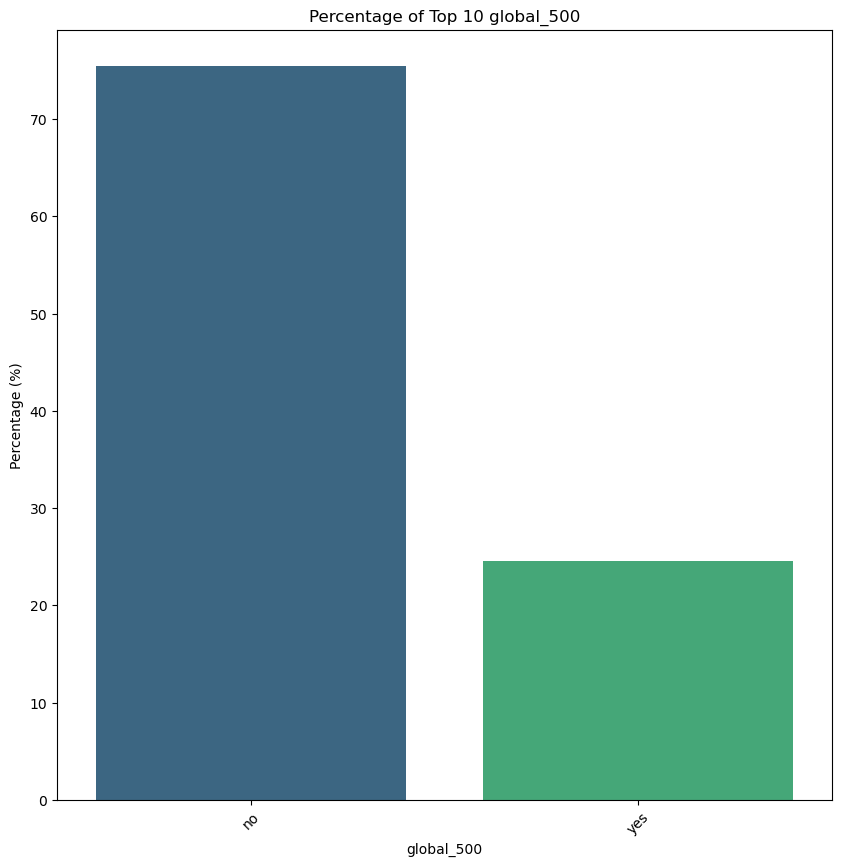

In [20]:
plot_top_categories_percentage(fortune_df,'global_500')

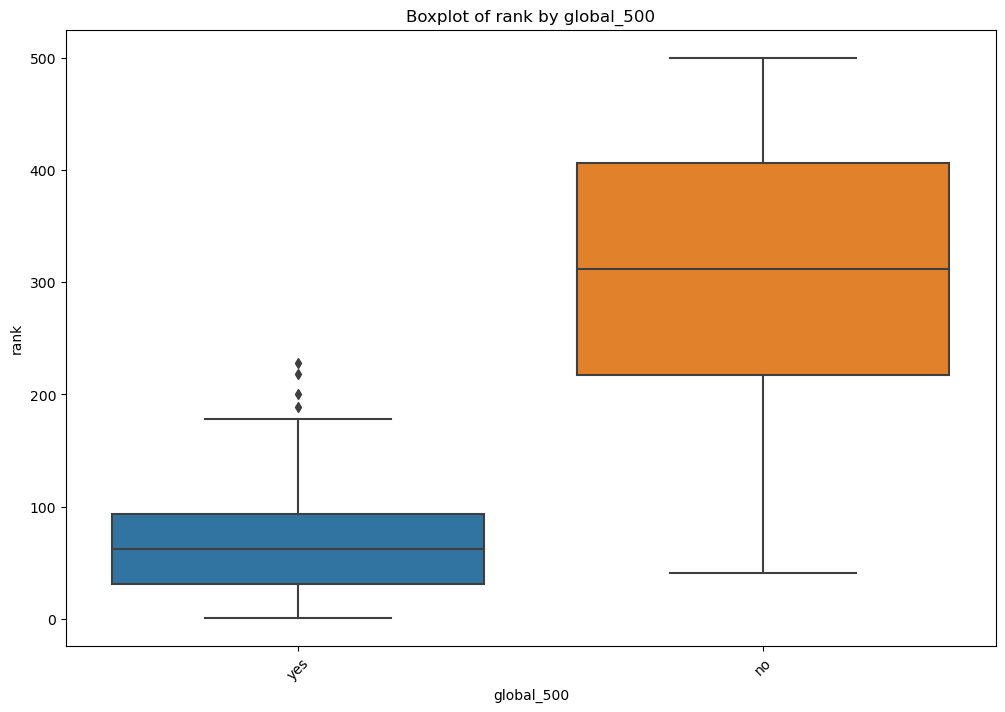

In [21]:
plot_numeric_vs_categorical(fortune_df, 'rank', 'global_500')

In [22]:
fortune_df['global_500'] = fortune_df.apply(
    lambda row: 'yes' if pd.isna(row['global_500']) and row['rank'] < 120 else ('no' if pd.isna(row['global_500']) else row['global_500']),
    axis=1
)
fortune_df.isnull().sum().sort_values()

name                         0
rank                         0
year                         0
industry                     0
sector                       0
headquarters_state           0
headquarters_city            0
revenue_mil                  0
asset_mil                    0
employees                    0
founder_is_ceo               0
female_ceo                   0
newcomer_to_fortune_500      0
global_500                   0
profit_mil                   3
market_value_mil           253
dtype: int64

---

In [23]:
fortune_df['profit_mil'].isnull().sum()

3

In [24]:
fortune_df['profit_mil'].unique()

array([16363., 32520., 19241., ...,  2690.,   576.,   658.])

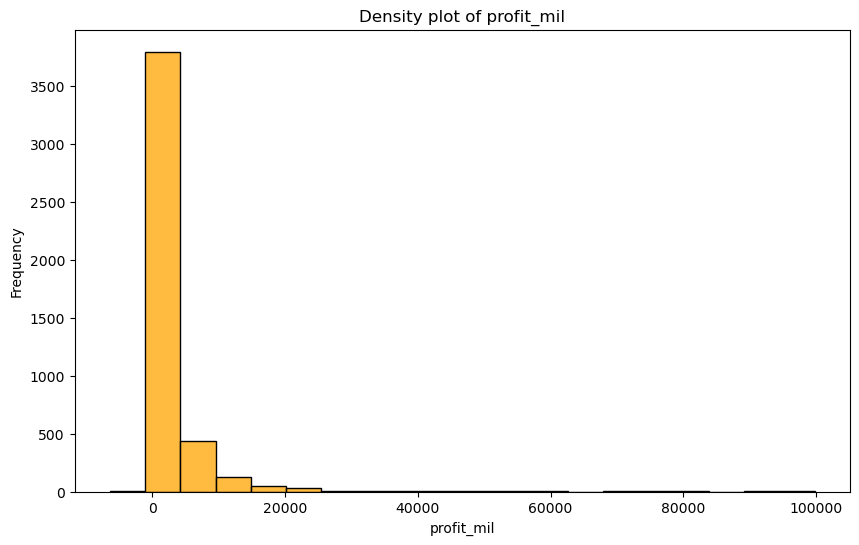

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(fortune_df['profit_mil'], bins=20, color='orange', edgecolor='black')
plt.title('Density plot of profit_mil')
plt.xlabel('profit_mil')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [26]:
fortune_df[['profit_mil']].describe()

,profit_mil
count,4497.000000
mean,2634.834556
std,5748.900776
min,-6406.000000
25%,421.000000
50%,1007.000000
75%,2447.000000
max,99803.000000


In [27]:
fortune_df2 = fortune_df[fortune_df['profit_mil'] >= 20000]
fortune_df2

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
1,Exxon Mobil,2,2015,Petroleum Refining,Energy,TX,Irving,356549.0,382597.0,32520.0,349493.0,83700.0,no,no,no,yes
4,Apple,5,2015,"Computers, Office Equipment",Technology,CA,Cupertino,724773.0,182795.0,39510.0,231839.0,97200.0,no,no,no,yes
20,JP Morgan Chase,21,2015,Commercial Banks,Financials,NY,New York,225861.0,102102.0,21762.0,2573126.0,241359.0,no,no,no,yes
29,Wells Fargo,30,2015,Commercial Banks,Financials,CA,San Francisco,279920.0,88372.0,23057.0,1687155.0,264500.0,no,no,no,yes
30,Microsoft,31,2015,Computer Software,Technology,WA,Redmond,333525.0,86833.0,22074.0,172384.0,128000.0,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,JPMorgan Chase,23,2023,Commercial Banks,Financials,NY,New York,383549.0,154792.0,37676.0,3665743.0,293723.0,no,no,no,yes
4025,Verizon Communications,26,2023,Telecommunications,Telecommunications,NY,New York,163333.0,136835.0,21256.0,379680.0,117100.0,no,no,no,yes
4030,Meta Platforms,31,2023,Internet Services and Retailing,Technology,CA,Menlo Park,549484.0,116609.0,23200.0,185727.0,86482.0,yes,no,no,yes
4031,Bank of America,32,2023,Commercial Banks,Financials,NC,Charlotte,228780.0,115053.0,27528.0,3051375.0,216823.0,no,no,no,yes


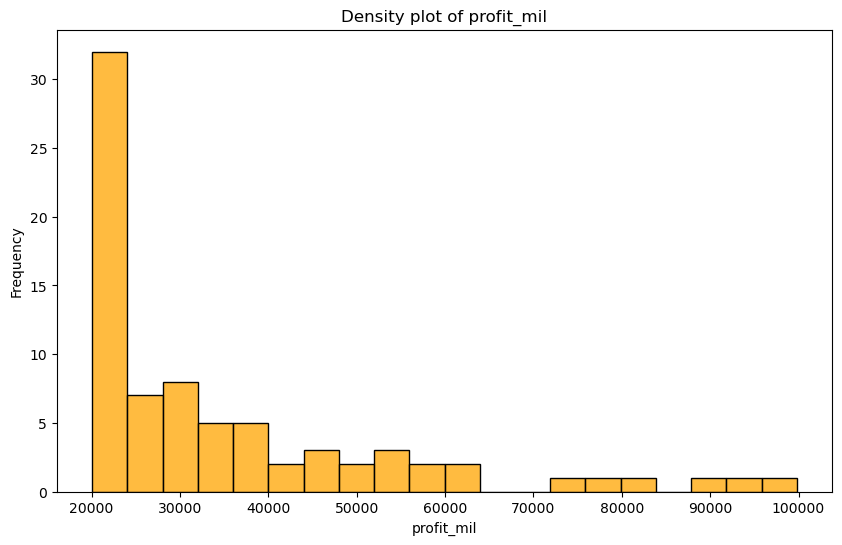

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(fortune_df2['profit_mil'], bins=20, color='orange', edgecolor='black')
plt.title('Density plot of profit_mil')
plt.xlabel('profit_mil')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

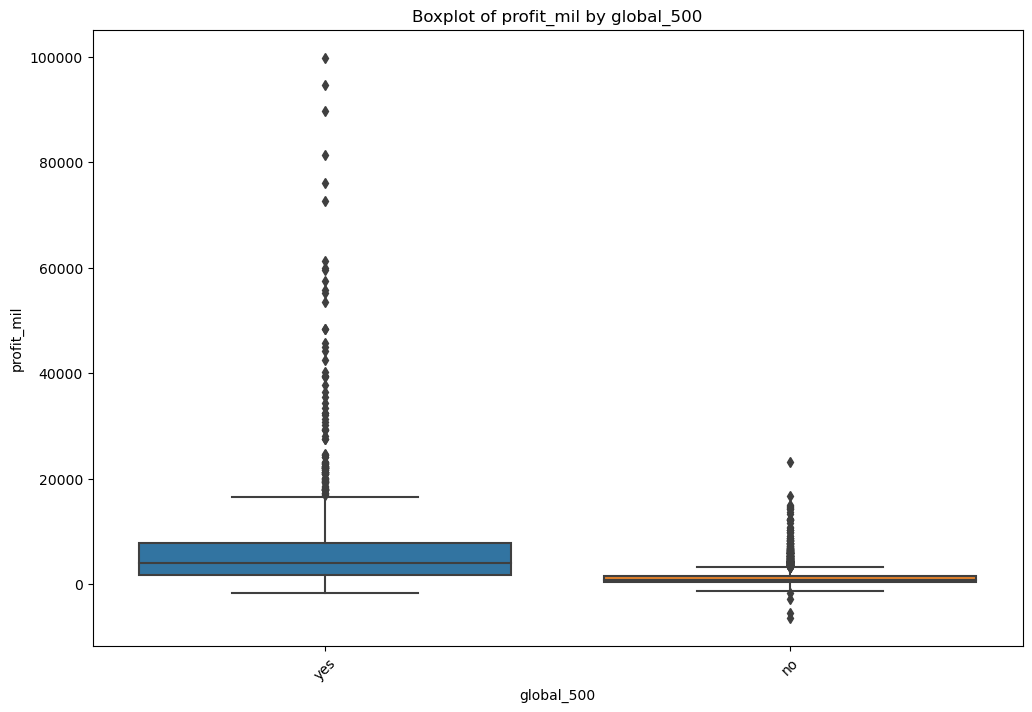

In [29]:
plot_numeric_vs_categorical(fortune_df, 'profit_mil', 'global_500')

In [30]:
global_500_yes = fortune_df[fortune_df['global_500'] == 'yes']
global_500_no = fortune_df[fortune_df['global_500'] == 'no']

In [31]:
global_500_yes[['profit_mil']].describe()

,profit_mil
count,1102.000000
mean,6928.958258
std,10095.274807
min,-1682.000000
25%,1680.000000
50%,3902.000000
75%,7724.750000
max,99803.000000


In [32]:
global_500_no[['profit_mil']].describe()

,profit_mil
count,3395.000000
mean,1240.983505
std,1670.220129
min,-6406.000000
25%,340.000000
50%,739.000000
75%,1503.500000
max,23119.000000


In [33]:
mean_profit_mil_no = fortune_df.loc[fortune_df['global_500'] == 'no', 'profit_mil'].mean()
fortune_df.loc[(fortune_df['global_500'] == 'no') & (fortune_df['profit_mil'].isna()), 'profit_mil'] = mean_profit_mil_no

In [34]:
fortune_df.isnull().sum().sort_values()

name                         0
rank                         0
year                         0
industry                     0
sector                       0
headquarters_state           0
headquarters_city            0
revenue_mil                  0
profit_mil                   0
asset_mil                    0
employees                    0
founder_is_ceo               0
female_ceo                   0
newcomer_to_fortune_500      0
global_500                   0
market_value_mil           253
dtype: int64

---

In [35]:
fortune_df['market_value_mil'].isnull().sum()

253

In [36]:
fortune_df['market_value_mil'].unique()

array([265344., 356549., 197381., ...,  66873.,  94338.,   8677.])

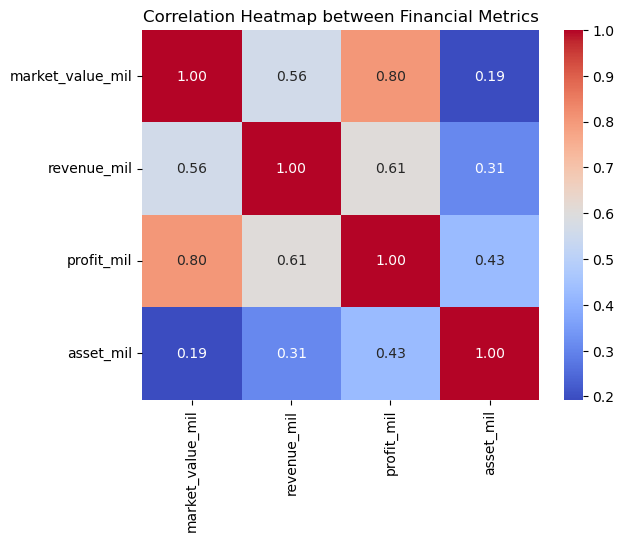

In [37]:
data_for_heatmap = fortune_df[['market_value_mil', 'revenue_mil', 'profit_mil', 'asset_mil']]
correlation_matrix = data_for_heatmap.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Financial Metrics')
plt.show()

In [38]:
train_data = fortune_df.dropna(subset=['profit_mil', 'market_value_mil'])

model = LinearRegression()

X_train = train_data[['profit_mil']]
y_train = train_data['market_value_mil']
model.fit(X_train, y_train)

missing_data = fortune_df[fortune_df['market_value_mil'].isna()]
X_missing = missing_data[['profit_mil']]
predicted_values = model.predict(X_missing)

fortune_df.loc[fortune_df['market_value_mil'].isna(), 'market_value_mil'] = predicted_values

In [39]:
fortune_df.isnull().sum().sort_values()

name                       0
rank                       0
year                       0
industry                   0
sector                     0
headquarters_state         0
headquarters_city          0
market_value_mil           0
revenue_mil                0
profit_mil                 0
asset_mil                  0
employees                  0
founder_is_ceo             0
female_ceo                 0
newcomer_to_fortune_500    0
global_500                 0
dtype: int64

## Adding columns : 

In [40]:
global_500_appearances = fortune_df.loc[fortune_df['global_500'] == 'yes', 'name'].value_counts().reset_index()

global_500_appearances.columns = ['name', 'appearances_500']

global_500_appearances


,name,appearances_500
0,Walmart,9
1,Liberty Mutual Insurance Group,9
2,Honeywell International,9
3,Best Buy,9
4,CHS,9
...,...,...
185,Safeway,1
186,DXC Technology,1
187,TIAA-CREF,1
188,DirecTV,1


#### Appearance in Fortune 500 :

In [41]:
company_counts_overall = fortune_df['name'].value_counts().reset_index()


company_counts_overall.columns = ['name', 'appearances']


company_counts_overall

,name,appearances
0,Walmart,9
1,Stanley Black & Decker,9
2,Unum Group,9
3,Public Service Enterprise Group,9
4,Reinsurance Group of America,9
...,...,...
763,Baxalta,1
764,Coca-Cola European Partners,1
765,Principal Financial Group,1
766,McGraw Hill Financial,1


# איסוף מידע

In [42]:
fortune_df['sector'].unique()

array(['Retailing', 'Energy', 'Financials', 'Technology',
       'Motor Vehicles & Parts', 'Food & Drug Stores', 'Wholesalers',
       'Telecommunications', 'Health Care', 'Aerospace & Defense',
       'Household Products', 'Food, Beverages & Tobacco',
       'Transportation', 'Chemicals', 'Industrials', 'Media', 'Apparel',
       'Hotels, Restaurants & Leisure', 'Materials',
       'Engineering & Construction', 'Business Services'], dtype=object)

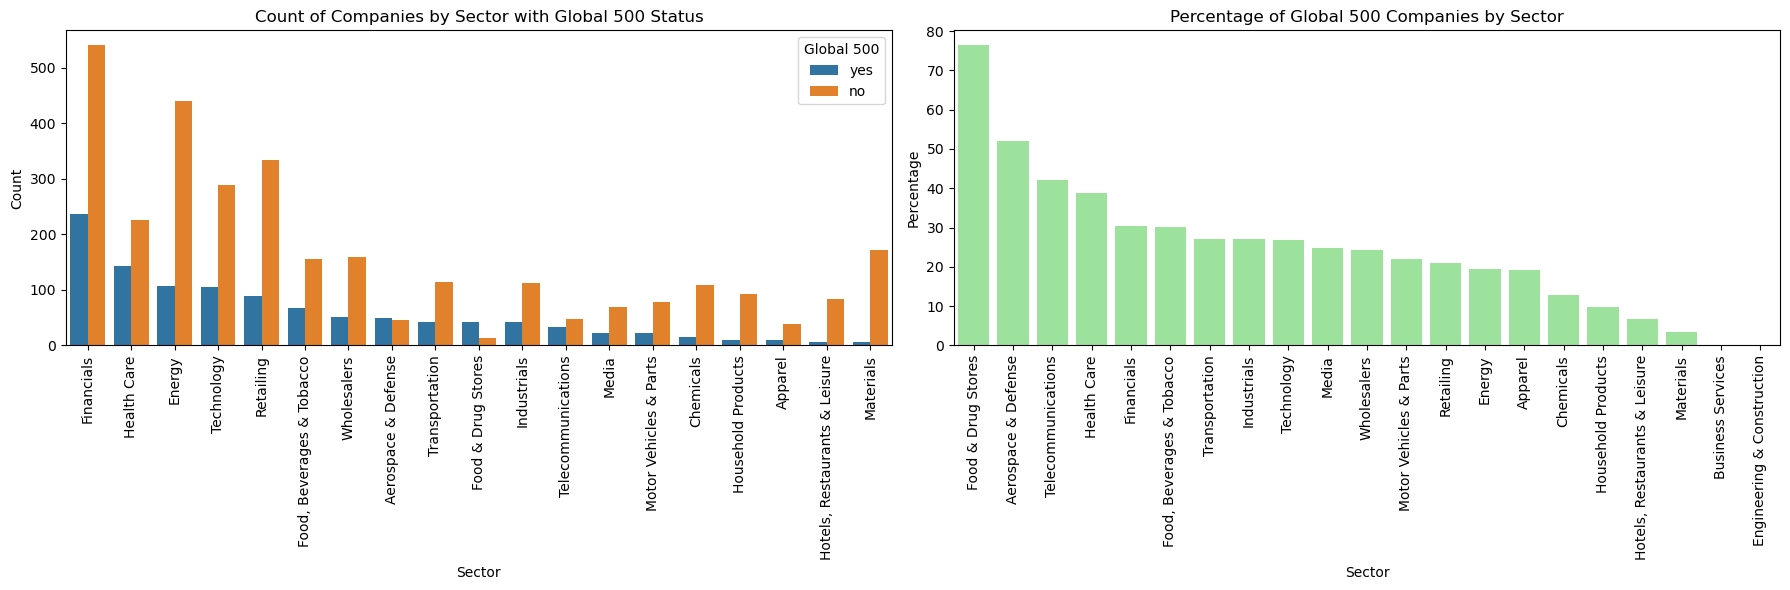

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
yes_global_500_counts = fortune_df[fortune_df['global_500'] == 'yes']['sector'].value_counts()
order = yes_global_500_counts.index



sns.countplot(data=fortune_df, x='sector', hue='global_500',order=order, ax=axes[0])
axes[0].set_title('Count of Companies by Sector with Global 500 Status')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].legend(title='Global 500', loc='upper right')

sector_counts = fortune_df['sector'].value_counts()
global_500_counts = fortune_df[fortune_df['global_500'] == 'yes']['sector'].value_counts()
percentages = (global_500_counts / sector_counts) * 100
percentages_sorted = percentages.sort_values(ascending=False)
colors = ['lightgreen' if p > 0 else 'gray' for p in percentages_sorted]
sns.barplot(x=percentages_sorted.index, y=percentages_sorted.values, palette=colors, ax=axes[1])
axes[1].set_title('Percentage of Global 500 Companies by Sector')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

#### It can be seen that there are sectors in which there are more companies, therefore their quantity in the Global 500 does not indicate the chances of a particular sector entering the Global 500.

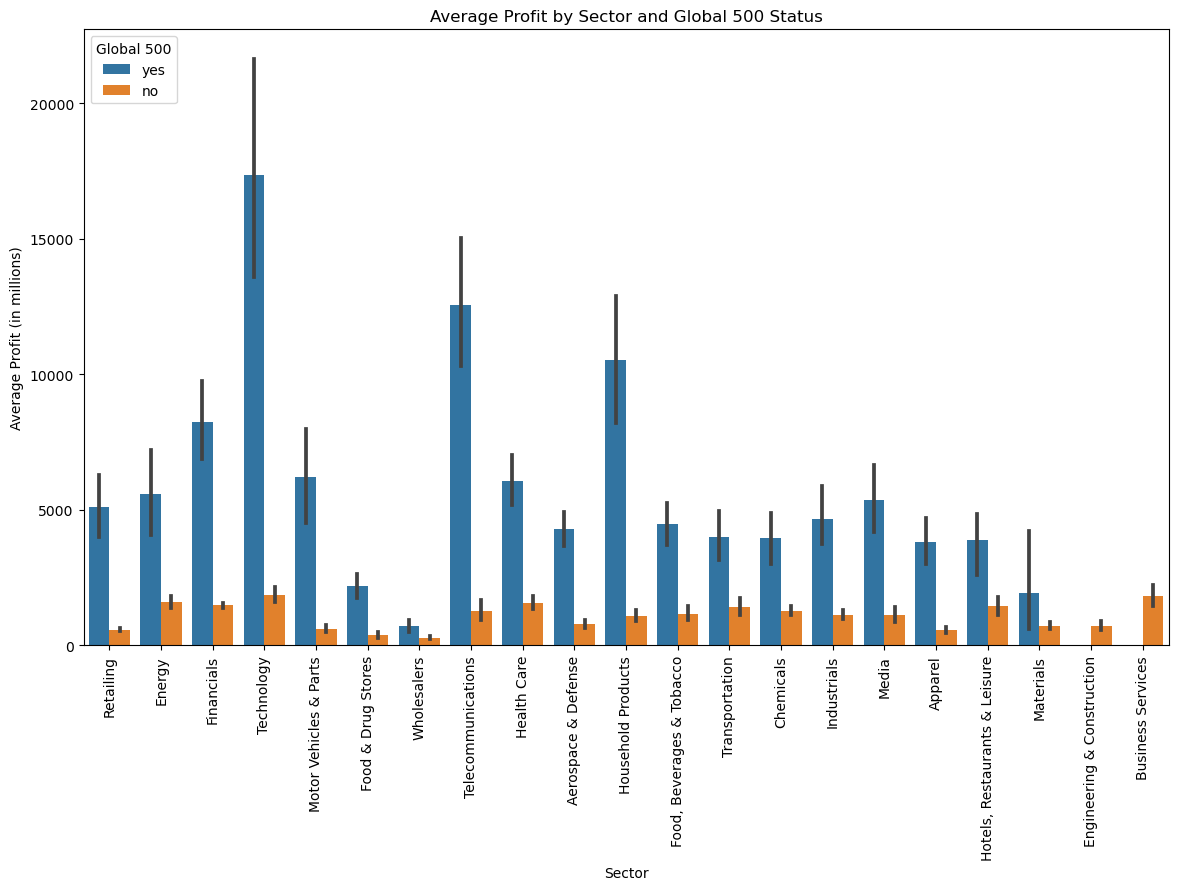

In [44]:
plt.figure(figsize=(14, 8))
sns.barplot(data=fortune_df, x='sector', y='profit_mil', hue='global_500', estimator=np.mean)
plt.title('Average Profit by Sector and Global 500 Status')
plt.xlabel('Sector')
plt.ylabel('Average Profit (in millions)')
plt.xticks(rotation=90)
plt.legend(title='Global 500')
plt.show()

#### It can be seen that the average profit of the companies that are in the Global 500 is high in every sector.

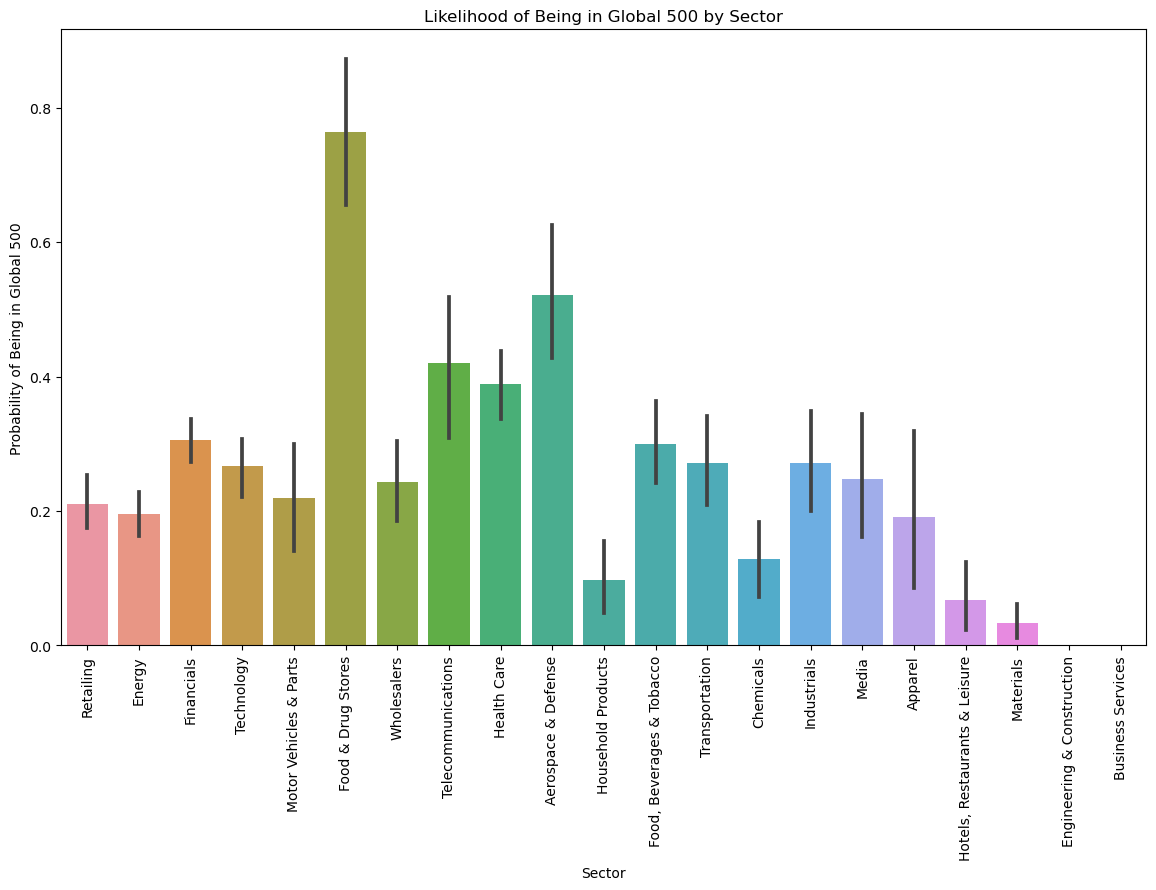

In [46]:
fortune_df['is_global_500'] = fortune_df['global_500'].apply(lambda x: 1 if x == 'yes' else 0)

# בחינת הסיכויים להימצאות בגלובל 500 לפי גודל החברה
plt.figure(figsize=(14, 8))
sns.barplot(data=fortune_df, x='sector', y='is_global_500', estimator=np.mean)
plt.title('Likelihood of Being in Global 500 by Sector')
plt.xlabel('Sector')
plt.ylabel('Probability of Being in Global 500')
plt.xticks(rotation=90)
plt.show()

#### We can conclude which sectors will enter the Global 500 without prior information about the company.